In [83]:
%%time
import numpy as np 
import pandas as pd 
import cv2
from keras.utils import np_utils
from keras.preprocessing import image
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.image as mpimg

from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import load_img, img_to_array

import warnings
warnings.filterwarnings('ignore')


CPU times: total: 15.6 ms
Wall time: 5 ms


Shape: (683, 1024, 3)


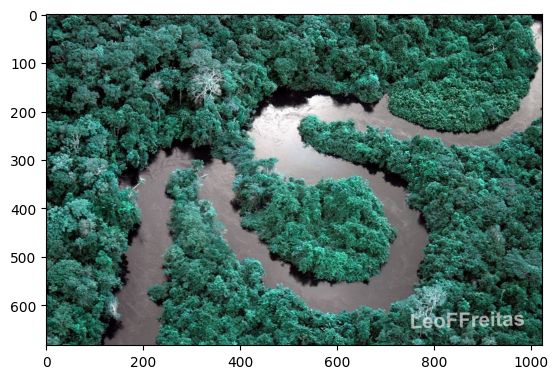

In [84]:
path_folder = r'C:\Users\pedro\OneDrive\Área de Trabalho\Arquivos\6semestre\APS\Detector-de-Desmatamento\Imagens'
flores4 = mpimg.imread(path_folder+'/train/1_Floresta/4.jpg')
flores4 = cv2.cvtColor(flores4,cv2.COLOR_BGR2RGB)
print(f'Shape: {flores4.shape}')
plt.imshow(flores4);


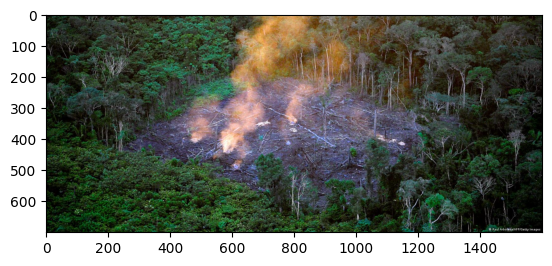

In [85]:
desmata2 = mpimg.imread(path_folder+'/train/2_Desmatamento/2.jpg')
desmata2 = cv2.cvtColor(desmata2,cv2.COLOR_BGR2RGB)
plt.imshow(desmata2);


In [86]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')


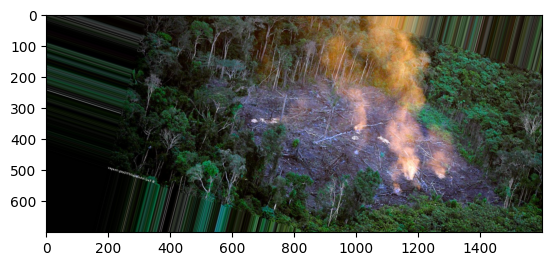

In [87]:
plt.imshow(image_gen.random_transform(desmata2));


In [88]:
image_gen.flow_from_directory(path_folder+'/train');


Found 68 images belonging to 2 classes.


In [89]:
input_shape = (150, 150, 3)


In [90]:
model = Sequential()


In [91]:
model.add(Conv2D(filters=32, kernel_size=(3,3),
input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),
input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),
input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [92]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 64)      

In [93]:
batch_size  = 16


In [94]:
train_image_gen = image_gen.flow_from_directory(path_folder+'/train', 
                                                target_size=input_shape[:2],
                                                batch_size = batch_size, 
                                                class_mode='binary')


Found 68 images belonging to 2 classes.


In [95]:
test_image_gen = image_gen.flow_from_directory(path_folder+'/test', 
                                                target_size=input_shape[:2],
                                                batch_size = batch_size, 
                                                class_mode='binary')


Found 12 images belonging to 2 classes.


In [96]:
train_image_gen.class_indices


{'1_Floresta': 0, '2_Desmatamento': 1}

In [97]:
results = model.fit_generator(train_image_gen, 
                              epochs           = 100, 
                              steps_per_epoch  = 4,
                              validation_data  = test_image_gen, 
                              validation_steps = 1)


Epoch 1/100
4/4 [==============================] - 4s 937ms/step - loss: 0.7892 - accuracy: 0.4688 - val_loss: 0.6566 - val_accuracy: 0.5833
Epoch 2/100
4/4 [==============================] - 2s 546ms/step - loss: 0.7046 - accuracy: 0.4808 - val_loss: 0.6484 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 3s 817ms/step - loss: 0.5743 - accuracy: 0.6923 - val_loss: 0.4506 - val_accuracy: 0.8333
Epoch 4/100
4/4 [==============================] - 3s 873ms/step - loss: 0.4414 - accuracy: 0.8269 - val_loss: 0.4463 - val_accuracy: 0.8333
Epoch 5/100
4/4 [==============================] - 3s 684ms/step - loss: 0.4776 - accuracy: 0.7692 - val_loss: 0.2051 - val_accuracy: 0.9167
Epoch 6/100
4/4 [==============================] - 3s 870ms/step - loss: 0.4954 - accuracy: 0.7115 - val_loss: 0.2647 - val_accuracy: 0.9167
Epoch 7/100
4/4 [==============================] - 3s 608ms/step - loss: 0.3018 - accuracy: 0.8654 - val_loss: 0.1951 - val_accuracy: 0.9167
Epoch 8/100
4

Epoch 59/100
4/4 [==============================] - 3s 543ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0670 - val_accuracy: 1.0000
Epoch 60/100
4/4 [==============================] - 3s 775ms/step - loss: 0.0568 - accuracy: 0.9808 - val_loss: 0.1696 - val_accuracy: 0.9167
Epoch 61/100
4/4 [==============================] - 3s 658ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.2009 - val_accuracy: 0.8333
Epoch 62/100
4/4 [==============================] - 3s 799ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.1962 - val_accuracy: 0.8333
Epoch 63/100
4/4 [==============================] - 2s 759ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9167
Epoch 64/100
4/4 [==============================] - 2s 616ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 65/100
4/4 [==============================] - 2s 738ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 

In [98]:
results.history['val_accuracy']


[0.5833333134651184,
 0.5,
 0.8333333134651184,
 0.8333333134651184,
 0.9166666865348816,
 0.9166666865348816,
 0.9166666865348816,
 1.0,
 0.9166666865348816,
 0.9166666865348816,
 0.9166666865348816,
 1.0,
 1.0,
 0.9166666865348816,
 0.9166666865348816,
 0.9166666865348816,
 0.8333333134651184,
 0.9166666865348816,
 0.8333333134651184,
 1.0,
 0.75,
 0.9166666865348816,
 0.9166666865348816,
 0.5,
 0.9166666865348816,
 0.8333333134651184,
 0.8333333134651184,
 0.9166666865348816,
 0.9166666865348816,
 0.9166666865348816,
 0.9166666865348816,
 1.0,
 1.0,
 0.8333333134651184,
 0.9166666865348816,
 1.0,
 0.8333333134651184,
 1.0,
 0.9166666865348816,
 0.9166666865348816,
 0.9166666865348816,
 0.9166666865348816,
 0.8333333134651184,
 0.8333333134651184,
 1.0,
 1.0,
 0.75,
 0.8333333134651184,
 1.0,
 1.0,
 0.8333333134651184,
 0.8333333134651184,
 0.9166666865348816,
 1.0,
 0.9166666865348816,
 0.8333333134651184,
 1.0,
 1.0,
 1.0,
 0.9166666865348816,
 0.8333333134651184,
 0.83333331346511

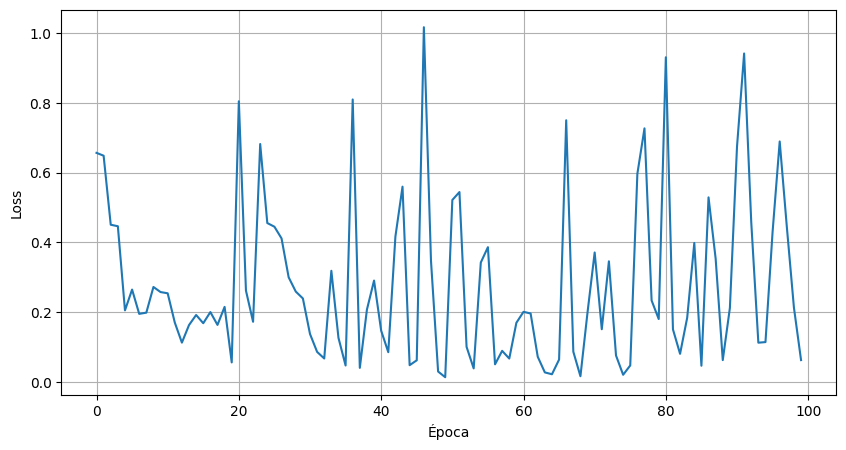

In [99]:
plt.figure(figsize=(10,5))
plt.plot(results.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Época')
plt.grid()
plt.savefig('loss.png')


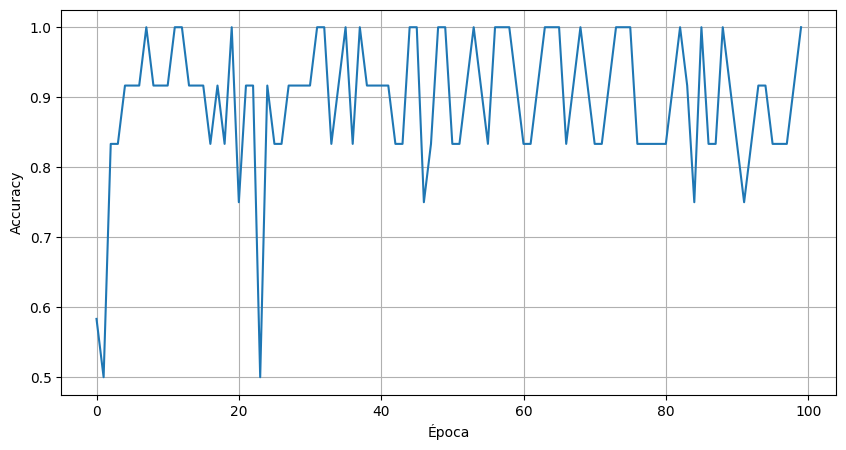

In [100]:
plt.figure(figsize=(10,5))
plt.plot(results.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Época')
plt.grid()
plt.savefig('accuracy.png')


In [105]:
print('Deseja classificar uma imagem?')
print('Digite 1 para sim e 2 para não')
resp = input('Resposta: ')

if resp == '1':
    while True:
        print('Na pasta de test. Em qual pasta está a imagem:')
        print('Digite 1 para Desmatamento e 2 para Floresta')
        respPasta = input('Resposta: ')
        
        if respPasta == '1':
            try:
                print('Qual o nome da imagem na pasta Desmatamento:')
                respNome = input('Resposta: ')
            
                desmata_file = path_folder+'/test/2_Desmatamento/'+respNome

                desmata_img = load_img(desmata_file, target_size=(150, 150))

                desmata_img = img_to_array(desmata_img)

                desmata_img = np.expand_dims(desmata_img, axis=0)
                desmata_img = desmata_img/255

                prediction_prob = model.predict(desmata_img)

                print(f'A probabilidade de estar desmatado é: {prediction_prob} ')
            except:
                print('Imagem não encontrada')
            
        else:
            try:
                print('Qual o nome da imagem na pasta Floresta:')
                respNome = input('Resposta: ')
            
                flores_file = path_folder+'/test/1_Floresta/'+respNome

                flores_img = load_img(flores_file, target_size=(150, 150))

                flores_img = img_to_array(flores_img)

                flores_img = np.expand_dims(flores_img, axis=0)
                flores_img = flores_img/255

                prediction_prob = model.predict(flores_img)

                print(f'A probabilidade de estar desmatado é: {prediction_prob} ')
            except:
                print('Imagem não encontrada')
            
        print('Deseja parar de classificar imagens:')
        print('Digite 1 para sim e 2 para não')
        resp = input('Resposta: ')
        
        if resp == '1':
            break

print('Programa finalizado')


Deseja classificar uma imagem?
Digite 1 para sim e 2 para não
Resposta: 1
Na pasta de test. Em qual pasta está a imagem:
Digite 1 para Desmatamento e 2 para Floresta
Resposta: 1
Qual o nome da imagem na pasta Desmatamento:
Resposta: 1.jpg
1/1 [==============================] - 0s 26ms/step
A probabilidade de estar desmatado é: [[0.76816475]] 
Deseja parar de classificar imagens:
Digite 1 para sim e 2 para não
Resposta: 2
Na pasta de test. Em qual pasta está a imagem:
Digite 1 para Desmatamento e 2 para Floresta
Resposta: 2
Qual o nome da imagem na pasta Floresta:
Resposta: 1.jpg
1/1 [==============================] - 0s 27ms/step
A probabilidade de estar desmatado é: [[8.615853e-07]] 
Deseja parar de classificar imagens:
Digite 1 para sim e 2 para não
Resposta: 2
Na pasta de test. Em qual pasta está a imagem:
Digite 1 para Desmatamento e 2 para Floresta
Resposta: 1
Qual o nome da imagem na pasta Desmatamento:
Resposta: 2.jpeg
1/1 [==============================] - 0s 27ms/step
A probab